<a href="https://colab.research.google.com/github/JuanDavidV8/Agro_project/blob/main/Proyecto_Final_Juan_Valencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Abstract

This project is based on an analysis of carbon dioxide (CO₂) emissions linked to the agri-food industry, which plays a crucial role by contributing 62% of global CO₂ emissions. The primary objective is to anticipate future CO₂ emissions and determine whether or not they influence climate change. To achieve this, it focuses on two fundamental variables: total CO2 emissions, represented by the label “total_emission”, and average temperature, represented by the label “Average Temperature °C”.

The adoption of these variables aims to generate a deeper and more effective understanding of the dynamics of emissions in the agri-food sector and their relationship with climate change. The aim is to identify patterns and relationships between emissions and temperature variations. Based on these findings, the aim is to propose and discover potential mitigation pathways, outlining concrete actions that can contribute to effectively addressing this environmental problem.

The methodology involves advanced statistical analysis and predictive modelling techniques, using machine learning tools to anticipate future CO2 emission scenarios. This analysis is an important tool for estimating the effects of increased emissions on the global climate system and guiding informed decision-making.

This project aims to understand and project CO2 emissions in the agri-food industry, while seeking to provide decision-makers with greater tools and crucial information to address critical environmental challenges and promote practices that aim for a sustainable future.

**Business Context:** Over the years, CO2 emissions have risen steadily, while the average temperature on each continent has followed an upward trend. This upward dynamic has continued over time.

Records are available from 1990 to 2020 for each of the variables included in the data set.

We want to estimate the future effects of emissions in order to make decisions regarding prevention and how to reduce the effects of CO2, thereby better addressing current environmental challenges such as climate change.

#Carga del Dataset y exploración de datos

In [6]:
df = pd.read_csv(r"C:\Users\valen\OneDrive\Escritorio\CO2 project\Agrofood_co2_emission.csv")
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [7]:
df.shape

(6965, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6965 entries, 0 to 6964
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Area                             6965 non-null   object 
 1   Year                             6965 non-null   int64  
 2   Savanna fires                    6934 non-null   float64
 3   Forest fires                     6872 non-null   float64
 4   Crop Residues                    5576 non-null   float64
 5   Rice Cultivation                 6965 non-null   float64
 6   Drained organic soils (CO2)      6965 non-null   float64
 7   Pesticides Manufacturing         6965 non-null   float64
 8   Food Transport                   6965 non-null   float64
 9   Forestland                       6472 non-null   float64
 10  Net Forest conversion            6472 non-null   float64
 11  Food Household Consumption       6492 non-null   float64
 12  Food Retail         

In [ ]:
df['Población Total'] = df['Total Population - Female'] + df['Total Population - Male']

In [10]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Población Total
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,10694796.0
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,10745167.0
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,12057433.0
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,14003760.0
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,15455554.0


In [ ]:
df['Average Temperature'] = df['Average Temperature °C']*10

In [13]:
#We create a new column to assign a continent for the country indicated in the Area column.

Continent ={
    'Africa': ['Algeria', 'Ethiopia PDR', 'Mayotte','American Samoa', 'United Republic of Tanzania', 'Western Sahara','Sudan (former)','Sao Tome and Principe','Democratic Republic of the Congo','Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Micronesia (Federated States of)', 'Viet Nam', 'Wallis and Futuna Islands','Tokelau','Republic of Korea', 'Syrian Arab Republic','New Caledonia', 'Niue','Iran (Islamic Republic of)', "Lao People's Democratic Republic",'Czech,oslovakia', "Democratic People's Republic of Korea",'China, Hong Kong SAR', 'China, Macao SAR', 'Cook Islands', 'China, mainland', 'China, Taiwan Province of','Armenia', 'Brunei Darussalam', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Holy See','Czechia', 'Czechoslovakia','Netherlands Antilles (former)','United Kingdom of Great Britain and Northern Ireland','Netherlands (Kingdom of the)', 'Serbia and Montenegro','Russian Federation','Republic of Moldova','French Polynesia', 'Isle of Man','Gibraltar','Faroe Islands','Channel Islands','British Virgin Islands','Belgium-Luxembourg','Anguilla','Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North and Center America': ['Antigua and Barbuda', 'Puerto Rico', 'United States of America', 'United States Virgin Islands','Saint Helena, Ascension and Tristan da Cunha', 'Turks and Caicos Islands','Saint Pierre and Miquelon','Northern Mariana Islands', 'Pacific Islands Trust Territory','Montserrat','Martinique','Greenland', 'Guadeloupe', 'Guam','Cayman Islands','Bermuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Falkland Islands (Malvinas)', 'Venezuela (Bolivarian Republic of)','Aruba', 'Bolivia (Plurinational State of)', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}

In [14]:
def assing_continent (country):
    for continent, countries in Continent.items():
        if country in countries:
           return continent
    return None

In [15]:
df['Continent'] = df['Area'].apply(assing_continent)

In [16]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C,Población Total,Average Temperature,Continent
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167,10694796.0,5.361667,Asia
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667,10745167.0,0.206667,Asia
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583,12057433.0,-2.595833,Asia
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917,14003760.0,1.019167,Asia
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250,15455554.0,3.722500,Asia


In [17]:
df.shape

(6965, 34)

## Cleaning the Dataset

In [18]:
df = df.drop(['Total Population - Female', 'Total Population - Male', 'Rural population', 'Urban population'], axis = 1) #Eliminamos las columnas de población para dejar unicamente la columna de población total

In [19]:
df = df.drop(['Area'], axis=1)

In [20]:
df = df.drop(['Average Temperature °C'], axis = 1)

In [21]:
df.shape

(6965, 28)

In [23]:
pd.set_option('display.max_rows', None)
serie = (df.isnull().sum()/df.shape[0])*100
serie = serie.sort_values(ascending = False)
serie = serie[serie>0]
serie

Crop Residues                      19.942570
On-farm energy use                 13.725772
Manure applied to Soils            13.323762
Manure Management                  13.323762
IPPU                               10.667624
Net Forest conversion               7.078248
Forestland                          7.078248
Food Household Consumption          6.791098
Fires in humid tropical forests     2.225413
Forest fires                        1.335248
Savanna fires                       0.445083
Continent                           0.057430
dtype: float64

<Axes: >

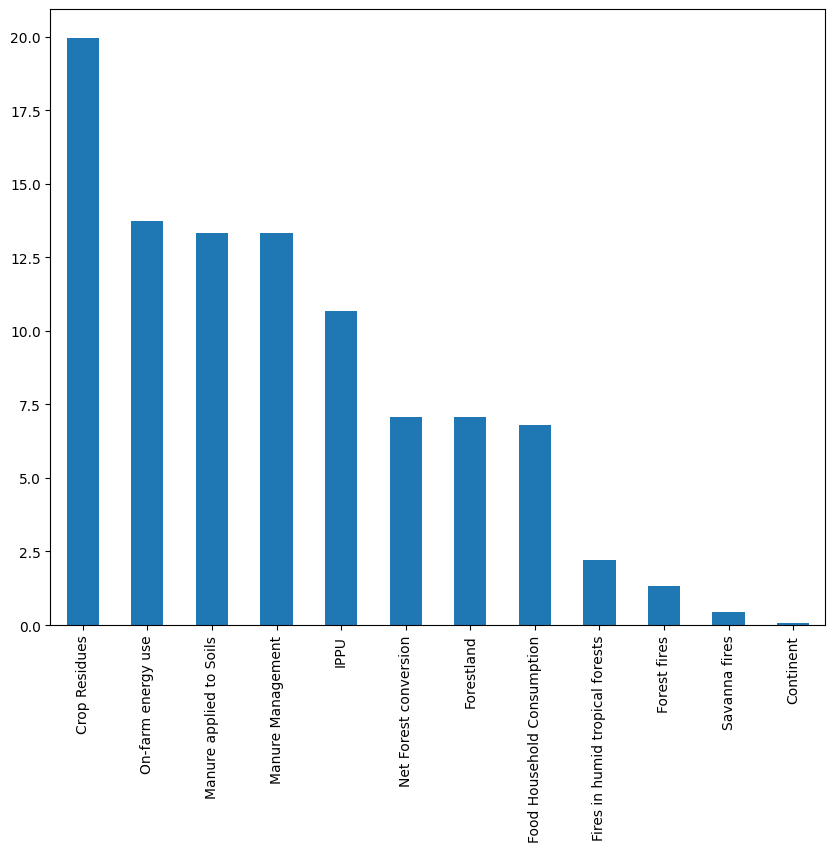

In [24]:
fig, ax = plt.subplots(figsize = (10, 8))
serie.plot(kind = 'bar')

In [26]:
import missingno as msn

<Axes: >

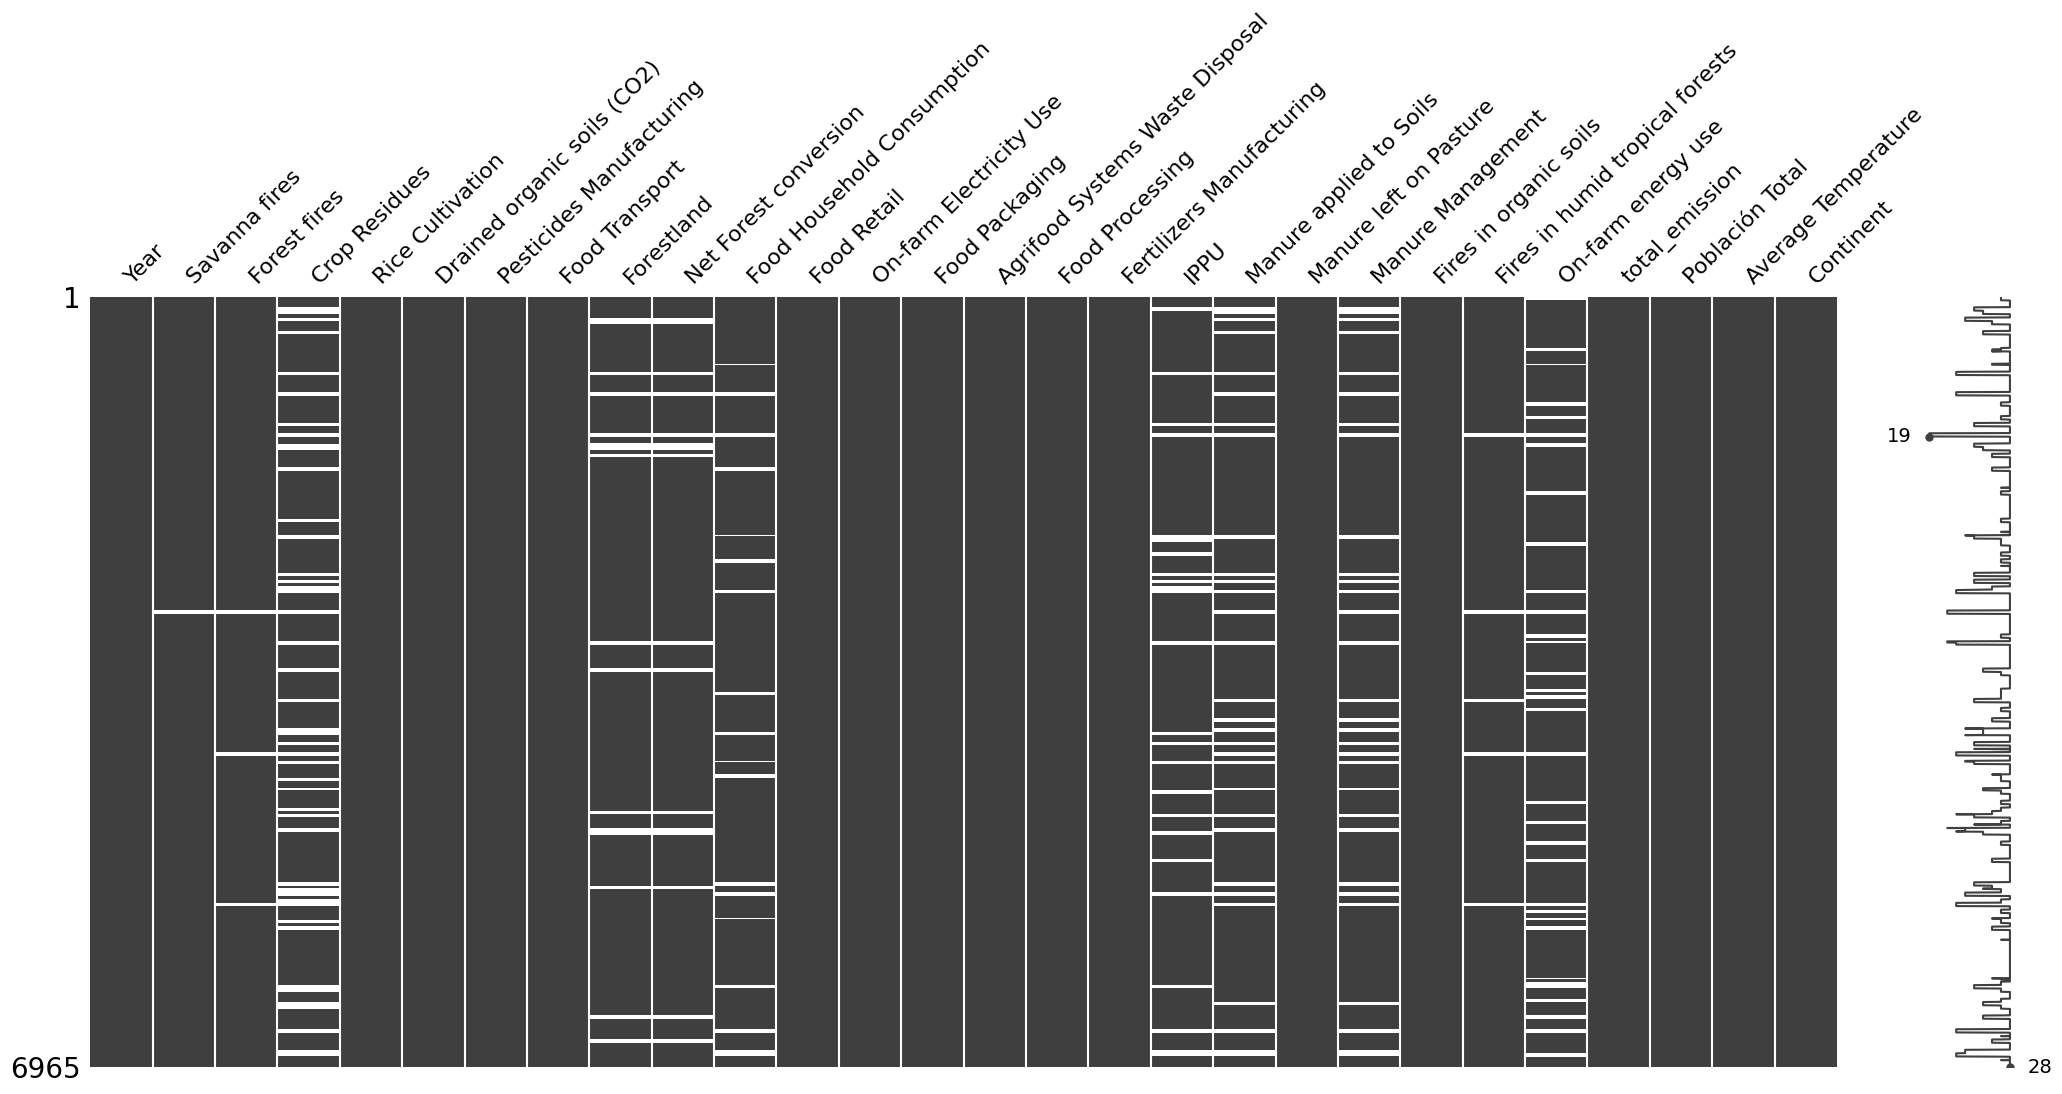

In [27]:
msn.matrix(df)

<Axes: >

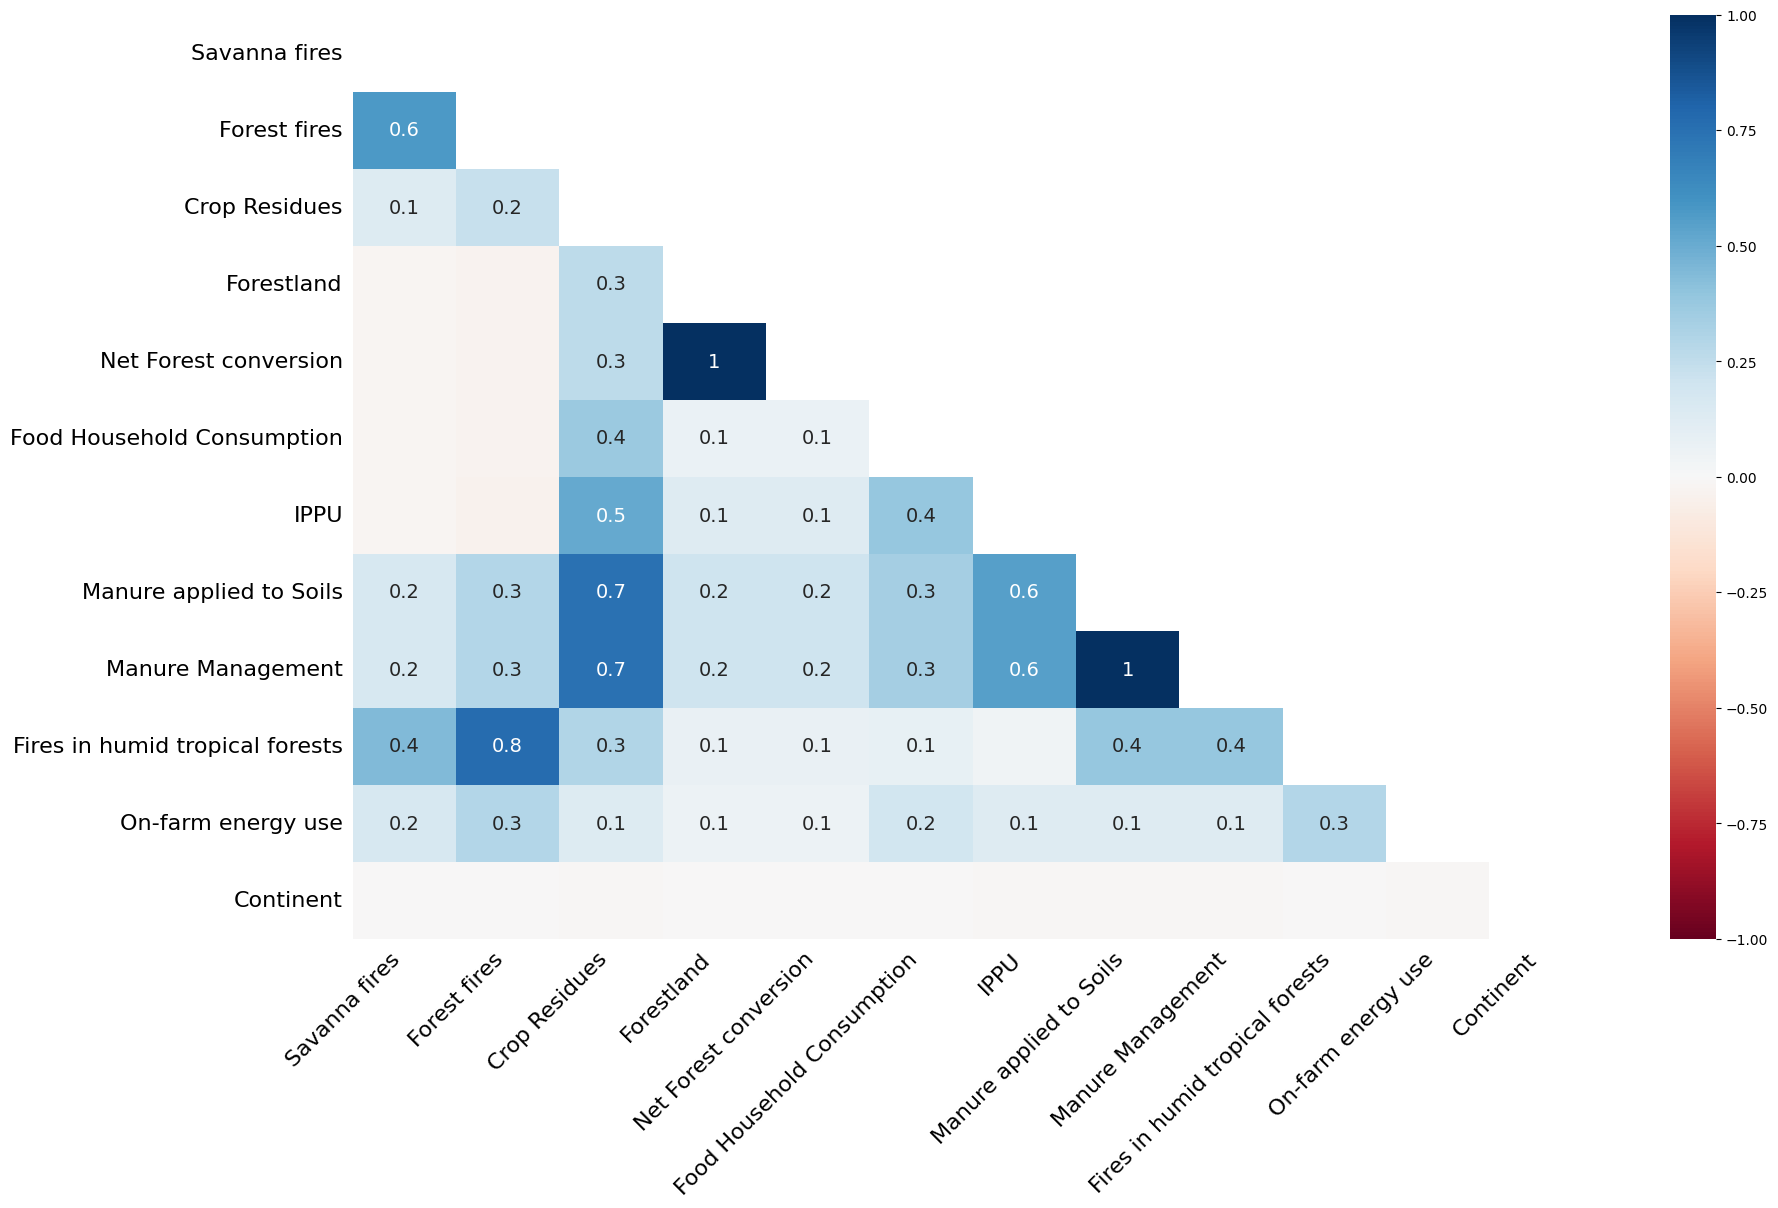

In [28]:
msn.heatmap(df)

<Axes: >

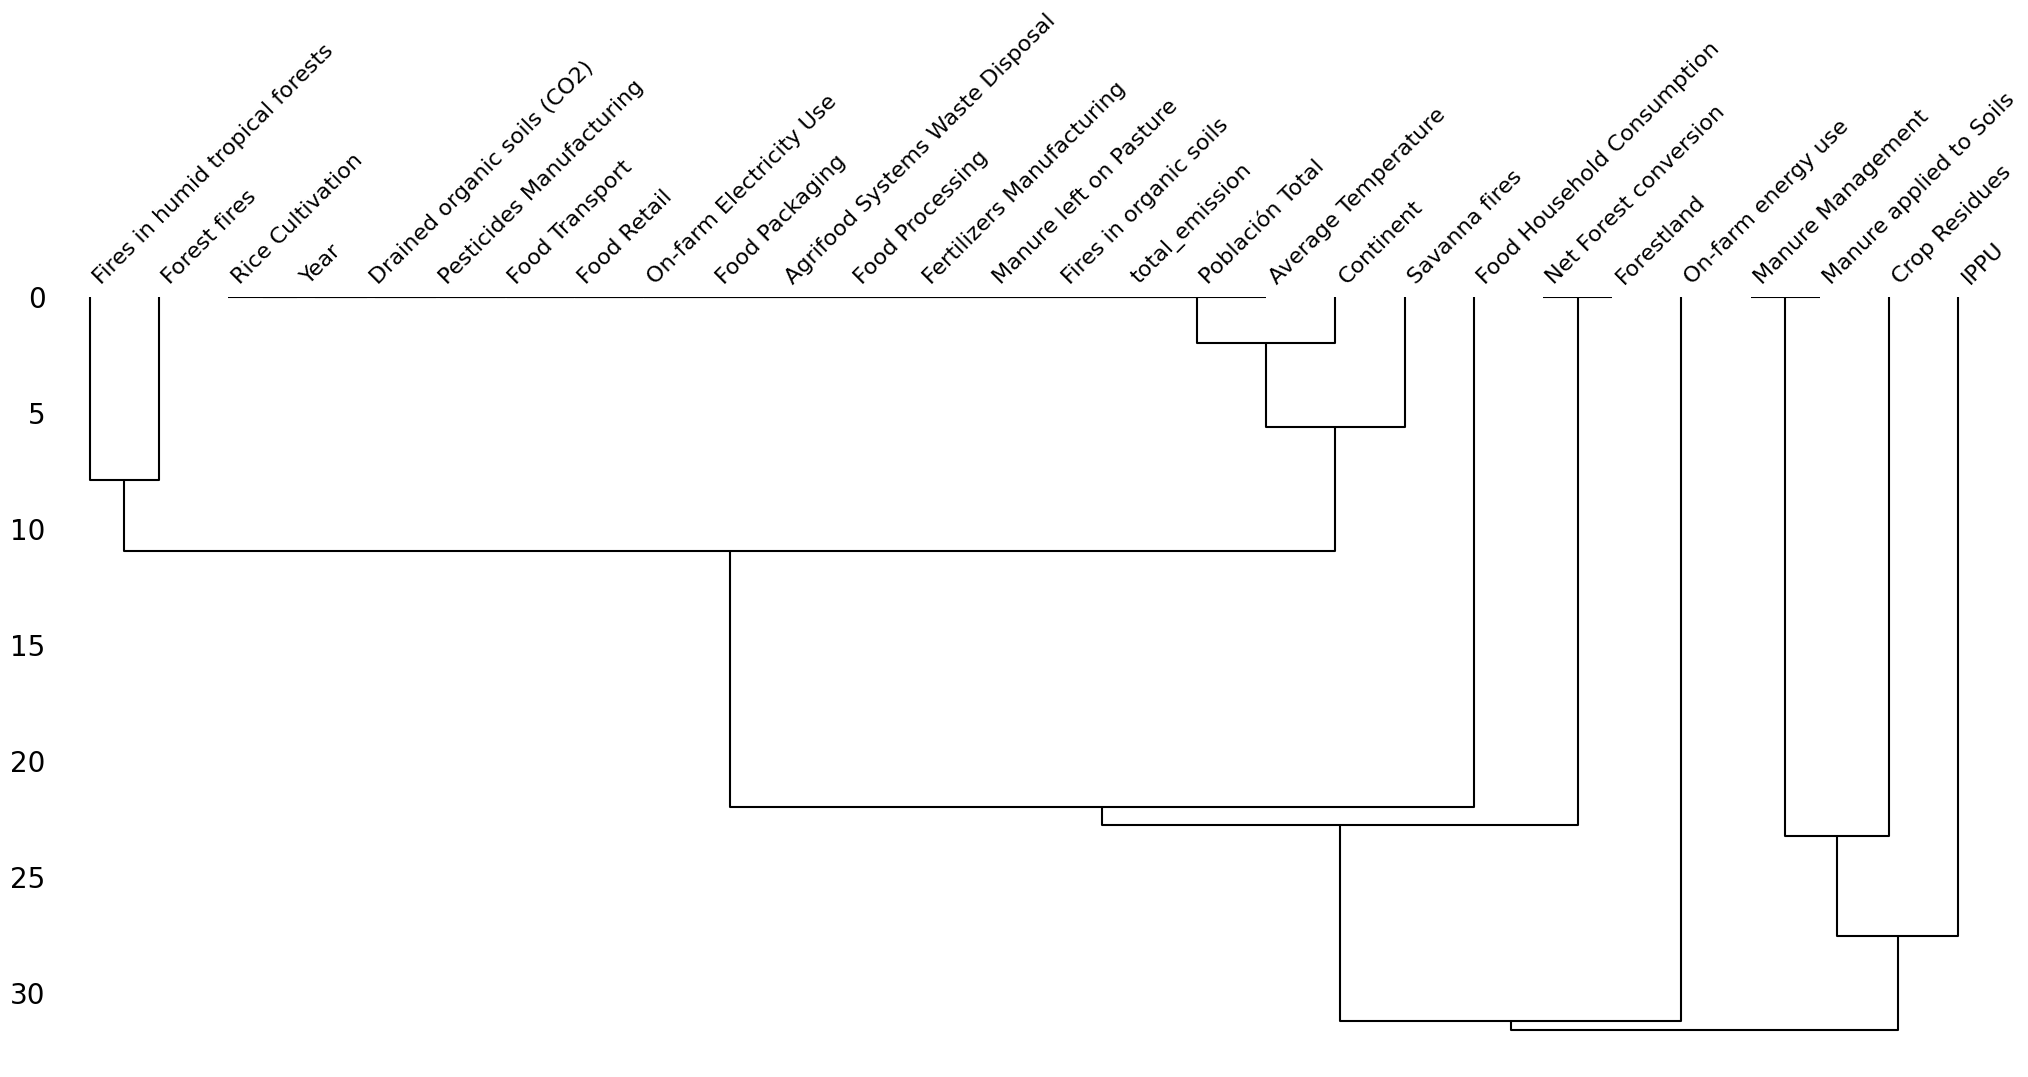

In [29]:
msn.dendrogram(df)

In [30]:
df['Crop Residues'].isnull().sum()

np.int64(1389)

In [31]:
df['On-farm energy use'].isnull().sum()

np.int64(956)

In [32]:
df['Manure applied to Soils'].isnull().sum()

np.int64(928)

In [33]:
df['Manure Management'].isnull().sum()

np.int64(928)

In [34]:
df['IPPU'].isnull().sum()

np.int64(743)

In [35]:
df['Forestland'].isnull().sum()

np.int64(493)

In [36]:
df['Net Forest conversion'].isnull().sum()

np.int64(493)

In [37]:
df['Food Household Consumption'].isnull().sum()

np.int64(473)

In [38]:
df['Fires in humid tropical forests'].isnull().sum()

np.int64(155)

In [39]:
df['Forest fires'].isnull().sum()

np.int64(93)

In [40]:
df['Savanna fires'].isnull().sum()

np.int64(31)

In [41]:
df['Continent'].isnull().sum()

np.int64(4)

In [42]:
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,IPPU,Manure applied to Soils,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,total_emission,Población Total,Average Temperature
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6.222000e+03,6037.000000,6965.000000,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,1.999150e+04,923.225603,3518.026573,2263.344946,1210.315532,668.452931,3008.982252,6.409124e+04,3.494410e+07,8.729891
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,1.114209e+05,3226.992039,9103.556202,7980.542461,22669.847760,3264.879486,12637.864430,2.283130e+05,1.485462e+08,5.559295
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.000000e+00,0.049000,0.000700,0.432900,0.000000,0.000000,0.031900,-3.918841e+05,5.200000e+02,-14.158333
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,3.903153e+01,16.303000,139.669900,37.632100,0.000000,0.000000,13.291900,5.221244e+03,4.081450e+05,5.113333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,8.037066e+02,120.443900,972.567400,269.856300,0.000000,0.000000,141.096300,1.214765e+04,4.895243e+06,8.343000
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,6.155175e+03,460.120200,2430.792600,1126.818900,0.000000,9.577875,1136.925400,3.513973e+04,1.817757e+07,12.067500
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,1.861641e+06,34677.360300,92630.756800,70592.646500,991717.543100,51771.256800,248879.176900,3.115114e+06,1.456928e+09,35.580833


In [43]:
col_delete = ['Crop Residues', 'On-farm energy use', 'Manure applied to Soils', 'Manure Management', 'IPPU'] #Columnas a borrar
col_median = ['Savanna fires', 'Forest fires', 'Fires in humid tropical forests'] #Columnas para agregar la mediana
col_mean = ['Forestland', 'Net Forest conversion', 'Food Household Consumption'] #Columnas para agregar la media

In [44]:
for i in col_mean:
    df[i] = df[i].fillna(df[i].mean())

In [45]:
for i in col_median:
    df[i] = df[i].fillna(df[i].median())

In [46]:
df = df.drop(labels = col_delete, axis = 1)

In [48]:
df = df.dropna(axis = 0)

In [49]:
df.shape

(6961, 23)

In [50]:
pd.set_option('display.max_rows', None)
serie = (df.isnull().sum()/df.shape[0])*100
serie = serie.sort_values(ascending = False)
serie = serie[serie>0]
serie

Series([], dtype: float64)

## Data visualizations answering problem questions

* Has the average temperature increased over the years or decreased?

In [52]:
df_group = df.groupby('Year').mean('Average Temperature')['Average Temperature']

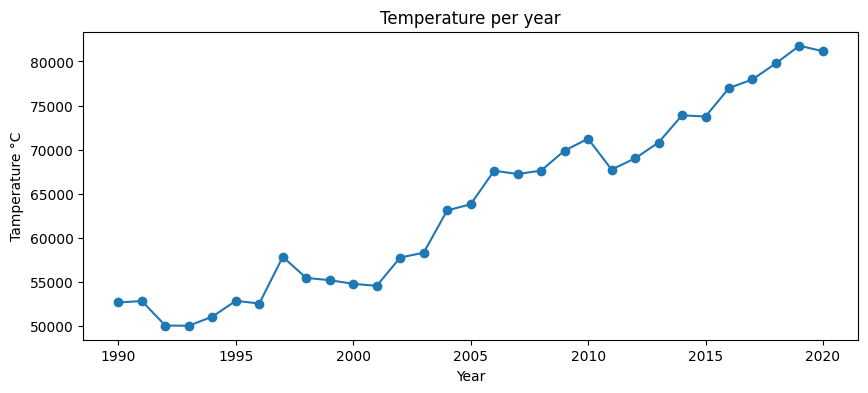

In [57]:
fig, ax = plt.subplots(figsize=(10,4))
x = df_group.index
y = df_group.values
ax.plot(x,y, marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('Tamperature °C')
ax.set_title('Temperature per year')
plt.grid(False)

* Have CO2 emissions increased, decreased or remained stable in recent years?

In [54]:
df_group = df.groupby('Year').mean('total_emission')['total_emission']

Text(0.5, 1.0, 'CO2 emissions per year')

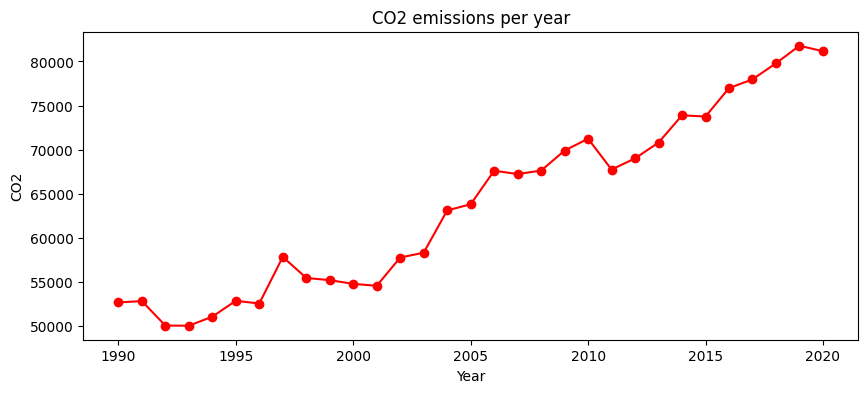

In [56]:
fig, ax = plt.subplots(figsize=(10,4))
x = df_group.index
y = df_group.values
ax.plot(x,y,color='r', marker='o')
ax.set_xlabel('Year')
ax.set_ylabel('CO2')
ax.set_title('CO2 emissions per year')

* Which continent has contributed the most with CO2 emissions over the years?

In [58]:
emisiones_contiente = df.groupby('Continent').mean('total_emission')['total_emission']

Text(0.5, 1.0, 'CO2 emissions by continent')

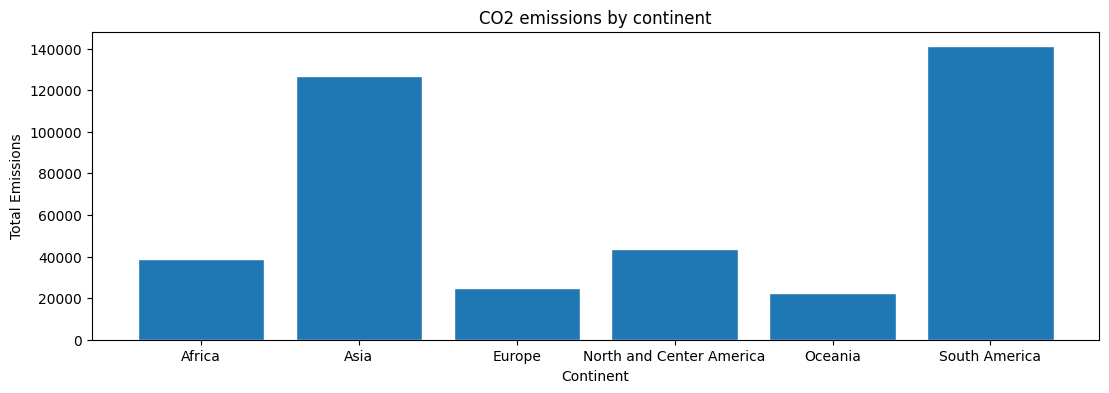

In [59]:
fig, ax = plt.subplots(figsize=(13,4))
x = emisiones_contiente.index
y = emisiones_contiente.values
ax.bar(x,y,edgecolor="white")
ax.set_xlabel('Continent')
ax.set_ylabel('Total Emissions')
ax.set_title('CO2 emissions by continent')

* What has been the temperature variation on each continent over the years?

Text(0, 0.5, 'Temperature °C')

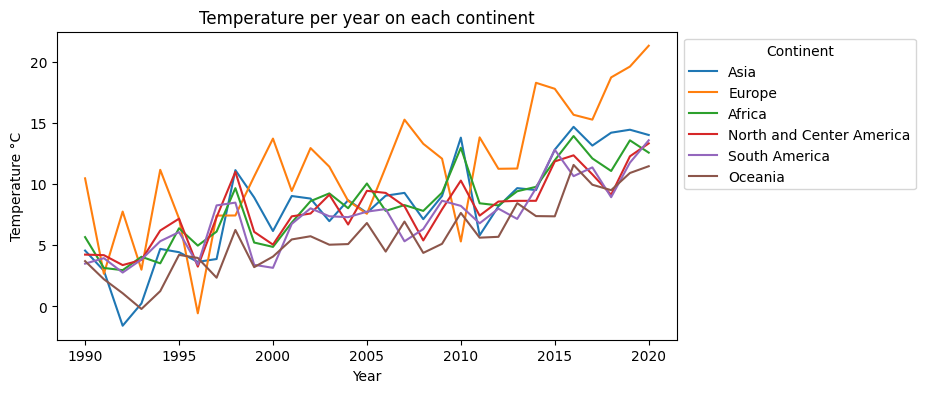

In [60]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(data= df ,x='Year', y='Average Temperature', hue='Continent', errorbar=None)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
plt.grid(False)
plt.title('Temperature per year on each continent')
plt.xlabel('Year')
plt.ylabel('Temperature °C')

* Is there a correlation between average temperature and CO2 emissions?

Text(0, 0.5, 'Total CO2 emissions')

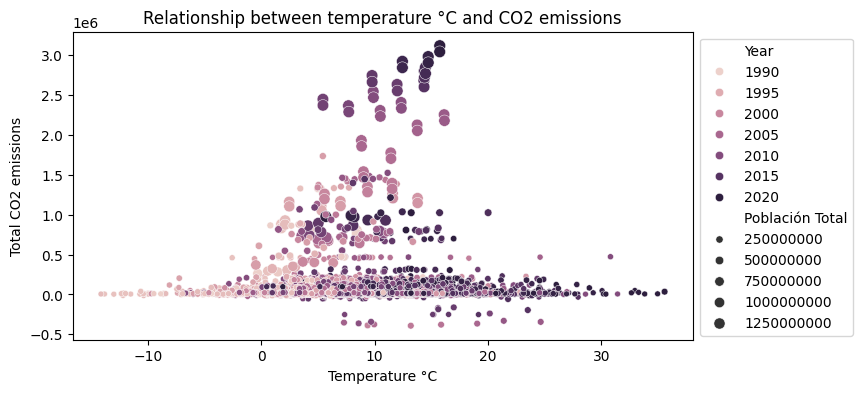

In [61]:
plt.figure(figsize=(8,4))
ax = sns.scatterplot(data= df, x='Average Temperature', y='total_emission', hue='Year', size='Población Total')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
plt.grid(False)
plt.title('Relationship between temperature °C and CO2 emissions')
plt.xlabel('Temperature °C')
plt.ylabel('Total CO2 emissions')

## Converting Continent Column to Dummies Data

In [194]:
continent = {
    'a': ['Africa'],
    'b': ['Asia'],
    'c': ['North and Center America'],
    'd': ['Oceania'],
    'e': ['Europe'],
    'f': ['South America'],
}

In [195]:
def assign_letter(continent, continent_dict):
    for letter, continents in continent_dict.items():
        if continent in continents:
            return continent
    return None

In [196]:
df["continent"] = df["Continent"].apply(lambda x: assign_letter(x, continent))

In [197]:
df= pd.get_dummies(df, columns=['continent'])

In [198]:
df.head()

,Year,Savanna fires,Forest fires,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,...,total_emission,Población Total,Average Temperature,Continent,continent_Africa,continent_Asia,continent_Europe,continent_North and Center America,continent_Oceania,continent_South America
0,1990,14.7237,0.0557,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,...,2198.963539,10694796.0,5.361667,Asia,0,1,0,0,0,0
1,1991,14.7237,0.0557,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,...,2323.876629,10745167.0,0.206667,Asia,0,1,0,0,0,0
2,1992,14.7237,0.0557,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,...,2356.304229,12057433.0,-2.595833,Asia,0,1,0,0,0,0
3,1993,14.7237,0.0557,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,...,2368.470529,14003760.0,1.019167,Asia,0,1,0,0,0,0
4,1994,14.7237,0.0557,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,...,2500.768729,15455554.0,3.722500,Asia,0,1,0,0,0,0


In [199]:
df = df.drop(['Continent'], axis = 1)

In [200]:
df.head()

,Year,Savanna fires,Forest fires,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,...,Fires in humid tropical forests,total_emission,Población Total,Average Temperature,continent_Africa,continent_Asia,continent_Europe,continent_North and Center America,continent_Oceania,continent_South America
0,1990,14.7237,0.0557,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,...,0.0,2198.963539,10694796.0,5.361667,0,1,0,0,0,0
1,1991,14.7237,0.0557,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,...,0.0,2323.876629,10745167.0,0.206667,0,1,0,0,0,0
2,1992,14.7237,0.0557,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,...,0.0,2356.304229,12057433.0,-2.595833,0,1,0,0,0,0
3,1993,14.7237,0.0557,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,...,0.0,2368.470529,14003760.0,1.019167,0,1,0,0,0,0
4,1994,14.7237,0.0557,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,...,0.0,2500.768729,15455554.0,3.722500,0,1,0,0,0,0


In [201]:
df.shape

(6961, 28)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6961 entries, 0 to 6964
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                6961 non-null   int64  
 1   Savanna fires                       6961 non-null   float64
 2   Forest fires                        6961 non-null   float64
 3   Rice Cultivation                    6961 non-null   float64
 4   Drained organic soils (CO2)         6961 non-null   float64
 5   Pesticides Manufacturing            6961 non-null   float64
 6   Food Transport                      6961 non-null   float64
 7   Forestland                          6961 non-null   float64
 8   Net Forest conversion               6961 non-null   float64
 9   Food Household Consumption          6961 non-null   float64
 10  Food Retail                         6961 non-null   float64
 11  On-farm Electricity Use             6961 no

## PCA dimensionality reduction

In [203]:
df.columns

Index(['Year', 'Savanna fires', 'Forest fires', 'Rice Cultivation',
       'Drained organic soils (CO2)', 'Pesticides Manufacturing',
       'Food Transport', 'Forestland', 'Net Forest conversion',
       'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use',
       'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'Manure left on Pasture',
       'Fires in organic soils', 'Fires in humid tropical forests',
       'total_emission', 'Población Total', 'Average Temperature',
       'continent_Africa', 'continent_Asia', 'continent_Europe',
       'continent_North and Center America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [205]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df[['Year', 'Savanna fires', 'Forest fires', 'Rice Cultivation',
       'Drained organic soils (CO2)', 'Pesticides Manufacturing',
       'Food Transport', 'Forestland', 'Net Forest conversion',
       'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use',
       'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'Manure left on Pasture',
       'Fires in organic soils', 'Fires in humid tropical forests','Población Total', 'Average Temperature',
       'continent_Africa', 'continent_Asia', 'continent_Europe',
       'continent_North and Center America', 'continent_Oceania',
       'continent_South America']])

In [206]:
covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00014368e+00, -1.13354517e-02, -8.10219978e-03,
         1.54313386e-03,  8.28271733e-03,  2.36665162e-02,
         6.30247777e-02, -1.94572738e-05, -2.29207235e-02,
         5.48304012e-02,  9.50569183e-02,  2.77201180e-02,
         3.43411284e-02,  1.67447881e-02,  2.72497954e-02,
         4.01948481e-02,  2.60608792e-02, -4.10131257e-03,
        -2.73975946e-03,  2.22087228e-02,  5.46173336e-01,
        -3.26959205e-03,  5.10415909e-04,  1.17930496e-02,
        -6.55380414e-03, -1.62728043e-03, -3.86760112e-03],
       [-1.13354517e-02,  1.00014368e+00,  5.07204064e-01,
        -3.07530054e-02,  1.40123482e-02,  6.07736108e-02,
         6.88087973e-02, -5.60431227e-02,  2.25971737e-01,
         2.06863142e-03,  1.43689545e-02, -8.18075095e-03,
         1.72869678e-02,  2.50173578e-02, -2.64193257e-03,
        -2.56542289e-02,  2.54225753e-01, -4.53313512e-03,
         4.49320119e-01,  9.15229570e-03, -4.68840591e-02,
         2.12571104e-01, -1.13597224e-01, -1.12030512e-

In [207]:
e_values, e_vectors = np.linalg.eig(covariance_matrix)

In [208]:
variance_explained = []
for i in e_values:
    variance_explained.append((i/sum(e_values))*100)

variance_explained

[36.52927778599095,
 10.830780529477519,
 6.714676436855452,
 6.307351177013404,
 5.495291601410834,
 4.758018987956323,
 4.459557657520257,
 4.145252221530975,
 3.9512248900214235,
 3.594676105817819,
 2.827393033714021,
 2.3028803312241446,
 1.8992296520261593,
 1.4494813079497317,
 1.2048953006595384,
 0.9562158848830706,
 0.8698504721717104,
 0.4144408706527285,
 0.3535189350586809,
 0.30069188285519693,
 0.17533561538504017,
 0.16787634069648327,
 0.13355365915406744,
 0.0960036400756947,
 0.025027073125694944,
 0.037498606773102156,
 -5.9043382868515216e-15]

In [209]:
pca = PCA(n_components = 5)
pca.fit(scaled)

PCA(n_components=5)

In [210]:
pca.explained_variance_ratio_

array([0.36529278, 0.10830781, 0.06714676, 0.06307349, 0.05495291])

In [211]:
reduced_scaled = pca.transform(scaled)
reduced_scaled

array([[-0.67297996, -0.44507149, -0.23895684,  1.98118382, -0.25997213],
       [-0.68097157, -0.37731894, -0.44091237,  2.44674797, -0.07906678],
       [-0.68275172, -0.343402  , -0.54311151,  2.67698372,  0.00517927],
       ...,
       [-0.99172681,  0.13890276, -0.92023835, -0.47587604, -0.98726974],
       [-0.94296338,  0.05578016, -0.71571288, -1.00127138, -1.20531793],
       [-0.99589559,  0.07587492, -0.98456687, -0.222368  , -0.89829034]])

In [212]:
df['pca1'] = scaled[:,0]
df['pca2'] = scaled[:,1]
df['pca3'] = scaled[:,2]
df['pca4'] = scaled[:,3]
df['pca5'] = scaled[:,4]

In [213]:
df.head()

,Year,Savanna fires,Forest fires,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,Food Household Consumption,...,continent_Asia,continent_Europe,continent_North and Center America,continent_Oceania,continent_South America,pca1,pca2,pca3,pca4,pca5
0,1990,14.7237,0.0557,686.00,0.0,11.807483,63.1152,-2388.803,0.0,79.0851,...,1,0,0,0,0,-1.702350,-0.222861,-0.244978,-0.202908,-0.220637
1,1991,14.7237,0.0557,678.16,0.0,11.712073,61.2125,-2388.803,0.0,80.4885,...,1,0,0,0,0,-1.589860,-0.222861,-0.244978,-0.203353,-0.220637
2,1992,14.7237,0.0557,686.00,0.0,11.712073,53.3170,-2388.803,0.0,80.7692,...,1,0,0,0,0,-1.477370,-0.222861,-0.244978,-0.202908,-0.220637
3,1993,14.7237,0.0557,686.00,0.0,11.712073,54.3617,-2388.803,0.0,85.0678,...,1,0,0,0,0,-1.364880,-0.222861,-0.244978,-0.202908,-0.220637
4,1994,14.7237,0.0557,705.60,0.0,11.712073,53.9874,-2388.803,0.0,88.8058,...,1,0,0,0,0,-1.252389,-0.222861,-0.244978,-0.201796,-0.220637


## Training and Test

In [62]:
df.columns

Index(['Year', 'Savanna fires', 'Forest fires', 'Rice Cultivation',
       'Drained organic soils (CO2)', 'Pesticides Manufacturing',
       'Food Transport', 'Forestland', 'Net Forest conversion',
       'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use',
       'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'Manure left on Pasture',
       'Fires in organic soils', 'Fires in humid tropical forests',
       'total_emission', 'Población Total', 'Average Temperature',
       'Continent'],
      dtype='object')

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
X = df.drop(columns = ['total_emission'], axis = 1)
Y = df['total_emission']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 42)

## Modelo 1: Random Forest Regressor

In [ ]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df.columns

Index(['Year', 'Savanna fires', 'Forest fires', 'Rice Cultivation',
       'Drained organic soils (CO2)', 'Pesticides Manufacturing',
       'Food Transport', 'Forestland', 'Net Forest conversion',
       'Food Household Consumption', 'Food Retail', 'On-farm Electricity Use',
       'Food Packaging', 'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'Manure left on Pasture',
       'Fires in organic soils', 'Fires in humid tropical forests',
       'total_emission', 'Población Total', 'Average Temperature',
       'continent_Africa', 'continent_Asia', 'continent_Europe',
       'continent_North and Center America', 'continent_Oceania',
       'continent_South America', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5'],
      dtype='object')

In [ ]:
regressor = RandomForestRegressor(random_state=42)

In [ ]:
search_space= {
    'n_estimators' : [50, 100, 150, 200],
    'max_depth' : [3, 6, 9],
}

In [ ]:
gs = GridSearchCV(estimator= regressor, param_grid= search_space, scoring= ['r2', 'neg_mean_squared_error', 'neg_median_absolute_error'], refit= 'r2', cv= 5, verbose= 4)

In [ ]:
gs.fit(x_train, y_train) #We use the GridSearchCV technique to find the appropriate value of the hyperparameters to train the algorithm and obtain higher performance

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-2566119583.105) neg_median_absolute_error: (test=-11524.562) r2: (test=0.930) total time=   0.9s
[CV 2/5] END max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-2811770244.962) neg_median_absolute_error: (test=-10314.298) r2: (test=0.951) total time=   1.0s
[CV 3/5] END max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-3402053643.086) neg_median_absolute_error: (test=-11844.459) r2: (test=0.925) total time=   1.0s
[CV 4/5] END max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-1913879020.447) neg_median_absolute_error: (test=-12566.469) r2: (test=0.960) total time=   0.9s
[CV 5/5] END max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-3090780919.263) neg_median_absolute_error: (test=-14024.340) r2: (test=0.908) total time=   0.9s
[CV 1/5] END max_depth=3, n_estimators=100; neg_mean_squared_error: (test=-252032884

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 6, 9],
                         'n_estimators': [50, 100, 150, 200]},
             refit='r2',
             scoring=['r2', 'neg_mean_squared_error',
                      'neg_median_absolute_error'],
             verbose=4)

In [ ]:
print(gs.best_params_)

{'max_depth': 9, 'n_estimators': 50}


In [ ]:
regressor = RandomForestRegressor(max_depth= 9, n_estimators= 50, random_state=42)

In [ ]:
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=50, random_state=42)

In [ ]:
y_pred = regressor.predict(x_test) 

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=['Ypredict'])
y_pred

,Ypredict
0,8.849337e+03
1,8.445515e+03
2,7.873891e+03
3,7.475745e+03
4,7.475745e+03
5,7.475745e+03
6,7.725898e+03
7,7.475745e+03
8,7.475745e+03
9,7.475745e+03


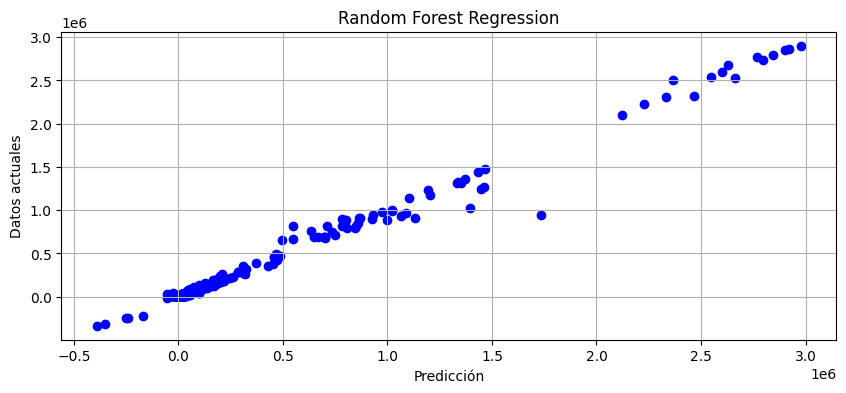

In [ ]:
plt.figure(figsize = (10,4))
plt.scatter(y_test, y_pred, color = 'blue')
plt.grid()
plt.title('Random Forest Regression')
plt.xlabel('Predicción')
plt.ylabel('Datos actuales')
plt.show()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error

In [ ]:
#Metricas de validación
print('R2=', r2_score(y_test, y_pred))
print('MAE= ', median_absolute_error(y_test, y_pred))
print('MSE=', mean_squared_error(y_test, y_pred))

R2= 0.9904817928219231
MAE=  4547.114049988275
MSE= 673510737.0944033


## Modelo 2: GradientBoosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gdrt = GradientBoostingRegressor(random_state= 42)

In [ ]:
search_space= {
    'n_estimators' : [50, 100, 150, 200],
    'max_depth' : [3, 6, 9, 12],
    'learning_rate' : [0.001, 0.01, 0.1, 1]
}

In [ ]:
gs = GridSearchCV(estimator= gdrt, param_grid= search_space, scoring= ['r2', 'neg_mean_squared_error', 'neg_median_absolute_error'], refit= 'r2', cv= 5, verbose= 4)

In [ ]:
gs.fit(x_train, y_train) #Utilizamos la tecnica de GridSearchCV para encontrar el valor de los hiperparametros adecuado para entrenar el algoritmo y obtener un mayor rendimiento

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-33408826847.391) neg_median_absolute_error: (test=-50217.295) r2: (test=0.088) total time=   2.6s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-52145158005.601) neg_median_absolute_error: (test=-47744.705) r2: (test=0.084) total time=   1.8s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-41497423513.847) neg_median_absolute_error: (test=-49647.395) r2: (test=0.089) total time=   1.3s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-43322771380.788) neg_median_absolute_error: (test=-50254.107) r2: (test=0.084) total time=   1.3s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-30723304704.466) neg_median_absolute_error: (test=-51337.223) r2: (test

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 6, 9, 12],
                         'n_estimators': [50, 100, 150, 200]},
             refit='r2',
             scoring=['r2', 'neg_mean_squared_error',
                      'neg_median_absolute_error'],
             verbose=4)

In [ ]:
print(gs.best_params_) #Valores indicados para los hiperparametros

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
gdrt = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 3, n_estimators= 200, random_state= 42)

In [ ]:
gdrt.fit(x_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=42)

In [ ]:
y_pred2 = gdrt.predict(x_test)

In [ ]:
y_pred2 = pd.DataFrame (y_pred2, columns= ['Y_pred2'])
y_pred2

,Y_pred2
0,8.108723e+03
1,8.408867e+03
2,1.334719e+04
3,4.140300e+03
4,2.882368e+03
5,4.737309e+03
6,1.377478e+04
7,3.359148e+03
8,1.185469e+04
9,2.956370e+03


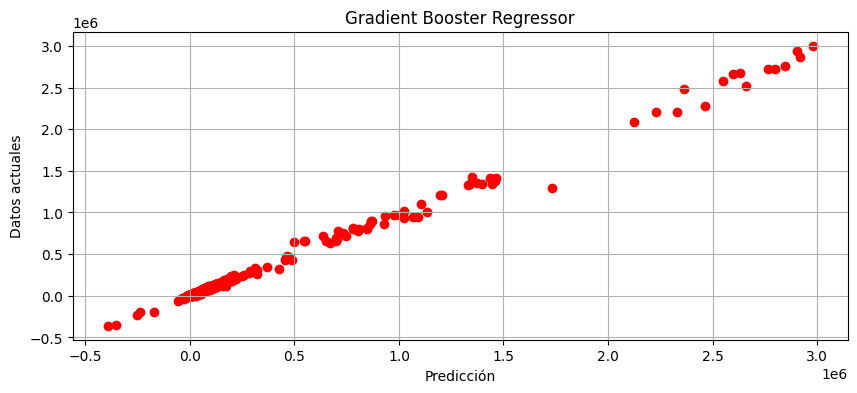

In [ ]:
plt.figure(figsize = (10,4))
plt.scatter(y_test, y_pred2, color = 'red')
plt.grid()
plt.title('Gradient Booster Regressor')
plt.xlabel('Predicción')
plt.ylabel('Datos actuales')
plt.show()

In [ ]:

print('R2=', r2_score(y_test, y_pred2))
print('MAE= ', median_absolute_error(y_test, y_pred2))
print('MSE=', mean_squared_error(y_test, y_pred2))

R2= 0.9961229459962653
MAE=  2033.4120464362904
MSE= 274341317.7456978



## Modelo 3: AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada = AdaBoostRegressor (random_state= 42)

In [ ]:
search_space= {
    'n_estimators' : [100, 150, 200],
    'learning_rate' : [0.01, 0.1, 1]
}

In [ ]:
gs = GridSearchCV(estimator= ada, param_grid= search_space, scoring= ['r2', 'neg_mean_squared_error', 'neg_median_absolute_error'], refit= 'r2', cv= 5, verbose= 4)

In [ ]:
gs.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END learning_rate=0.01, n_estimators=100; neg_mean_squared_error: (test=-3019233435.788) neg_median_absolute_error: (test=-18093.043) r2: (test=0.918) total time=   3.3s
[CV 2/5] END learning_rate=0.01, n_estimators=100; neg_mean_squared_error: (test=-3006713679.539) neg_median_absolute_error: (test=-19404.618) r2: (test=0.947) total time=   3.4s
[CV 3/5] END learning_rate=0.01, n_estimators=100; neg_mean_squared_error: (test=-3771227962.946) neg_median_absolute_error: (test=-20781.340) r2: (test=0.917) total time=   2.7s
[CV 4/5] END learning_rate=0.01, n_estimators=100; neg_mean_squared_error: (test=-3074504656.813) neg_median_absolute_error: (test=-18945.805) r2: (test=0.935) total time=   2.6s
[CV 5/5] END learning_rate=0.01, n_estimators=100; neg_mean_squared_error: (test=-3840549938.542) neg_median_absolute_error: (test=-19698.853) r2: (test=0.886) total time=   2.6s
[CV 1/5] END learning_rate=0.01, n_estimators

GridSearchCV(cv=5, estimator=AdaBoostRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [100, 150, 200]},
             refit='r2',
             scoring=['r2', 'neg_mean_squared_error',
                      'neg_median_absolute_error'],
             verbose=4)

In [ ]:
print(gs.best_params_) 

{'learning_rate': 0.1, 'n_estimators': 200}


In [ ]:
ada = AdaBoostRegressor (learning_rate= 0.1, n_estimators= 200, random_state= 42)

In [ ]:
ada.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=200, random_state=42)

In [ ]:
y_pred3 = ada.predict(x_test)

In [ ]:
y_pred3 = pd.DataFrame(y_pred3, columns=['Y_predict3'])
y_pred3

,Y_predict3
0,4.559574e+04
1,5.643596e+04
2,5.643596e+04
3,4.013647e+04
4,4.559574e+04
5,4.559574e+04
6,5.643596e+04
7,4.559574e+04
8,4.559574e+04
9,4.559574e+04


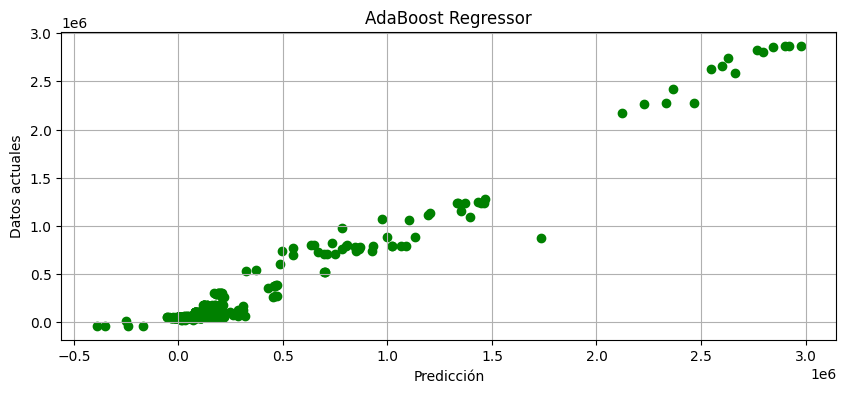

In [ ]:
plt.figure(figsize = (10,4))
plt.scatter(y_test, y_pred3, color = 'green')
plt.grid()
plt.title('AdaBoost Regressor')
plt.xlabel('Predicción')
plt.ylabel('Datos actuales')
plt.show()

In [ ]:

print('R2=', r2_score(y_test, y_pred3))
print('MAE= ', median_absolute_error(y_test, y_pred3))
print('MSE=', mean_squared_error(y_test, y_pred3))

R2= 0.9561496915306305
MAE=  37729.92415975639
MSE= 3102858871.0535936


# Model 4: XGB Regressor

In [218]:
pip install xgboost

In [219]:
from xgboost import XGBRegressor

In [220]:
xgb = XGBRegressor(random_state = 42)

In [222]:
search_space= {
    'n_estimators' : [50, 100, 150, 200],
    'max_depth' : [3, 6, 9, 12],
    'gamma' : [0.01, 0.1],
    'learning_rate' : [0.001, 0.01, 0.1, 1]
}

In [230]:
gs = GridSearchCV(estimator= xgb, param_grid= search_space, scoring= ['r2', 'neg_mean_squared_error', 'neg_median_absolute_error'], refit= 'r2', cv= 5, verbose= 4)

In [ ]:
gs.fit(x_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-33770704896.377) neg_median_absolute_error: (test=-50220.856) r2: (test=0.078) total time=   0.5s
[CV 2/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-52210846003.876) neg_median_absolute_error: (test=-47787.589) r2: (test=0.083) total time=   0.1s
[CV 3/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-41684476014.147) neg_median_absolute_error: (test=-49706.657) r2: (test=0.085) total time=   0.1s
[CV 4/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-43530546929.556) neg_median_absolute_error: (test=-50244.051) r2: (test=0.080) total time=   0.1s
[CV 5/5] END gamma=0.01, learning_rate=0.001, max_depth=3, n_estimators=50; neg_mean_squared_error: (test=-3102605212

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'gamma': [0.01, 0.1],
                         'learning_rate': [0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 6, 9, 12],
                         'n_estimators': [50, 100, 150, 200]},
             refit='r2',
             scoring=['r2', 'neg_mean_squared_error',
                      'neg_median_absolute_error'],
             verbose=4)

In [ ]:
print(gs.best_params_)

{'gamma': 0.01, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [234]:
xgb = XGBRegressor(gamma= 0.01, learning_rate= 0.1, max_depth= 3, n_stimators= 200, random_state = 42)

In [235]:
xgb.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [02:50:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_stimators" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.01, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             n_stimators=200, num_parallel_tree=None, ...)

In [236]:
y_pred4 = xgb.predict(x_test)

In [237]:
y_pred4 = pd.DataFrame(y_pred4, columns=['Y_predict3'])
y_pred4

,Y_predict3
0,8.022340e+03
1,1.113762e+04
2,1.180995e+04
3,6.704301e+03
4,5.583210e+03
5,6.704301e+03
6,1.020366e+04
7,7.407000e+03
8,1.210610e+04
9,5.583210e+03


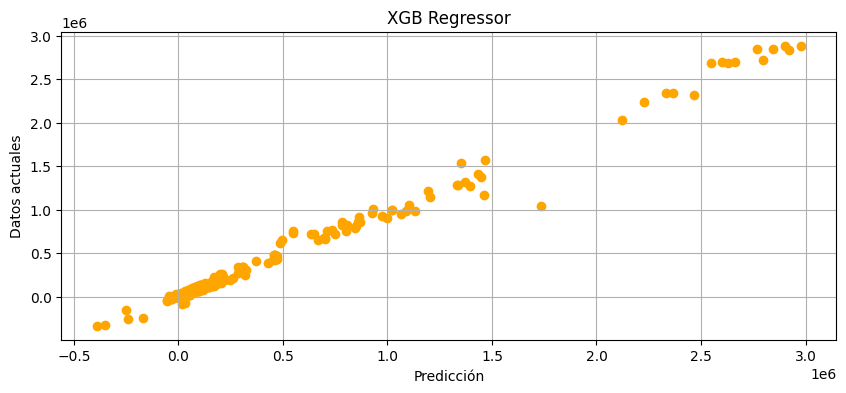

In [239]:
plt.figure(figsize = (10,4))
plt.scatter(y_test, y_pred4, color = 'orange')
plt.grid()
plt.title('XGB Regressor')
plt.xlabel('Predicción')
plt.ylabel('Datos actuales')
plt.show()

In [ ]:

print('R2=', r2_score(y_test, y_pred4))
print('MAE= ', median_absolute_error(y_test, y_pred4))
print('MSE=', mean_squared_error(y_test, y_pred4))

R2= 0.9919980342289263
MAE=  3592.017344968641
MSE= 566221113.2673545


## Chosen Algorithm

We select the results obtained from algorithm number 2, GradientBoosting, based on an exhaustive analysis of the evaluation metrics. This algorithm has demonstrated superior performance compared to other alternatives considered. The choice of this model is based on the robustness and consistency of its results, supported by outstanding performance in the specific selection metrics previously established.

The decision to adopt GradientBoosting as the main algorithm for this project aligns with the initial premise of the project. The values ​​generated by this algorithm will be used in the predictive phase of the project, specifically for the estimation of CO2 emissions, in accordance with the objectives outlined at the beginning of the initiative. This strategic approach, supported by evidence of its effectiveness across relevant metrics, supports confidence in the suitability of GradientBoosting to address the specific challenges of this project.